# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Check Data (Mouse)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
#Check Data (Study)
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
mergedmouse_study_df=pd.merge( study_results, mouse_metadata, how='left', on='Mouse ID', sort=False, suffixes=("_x", "_y"), copy=True).reindex()
# Display the data table for preview
display(mergedmouse_study_df.head(12))
display(f'Number of Records is {len(mergedmouse_study_df)}')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


'Number of Records is 1893'

In [4]:
# Checking the number of mice.
mergedmouse_study_mouse_ID = mergedmouse_study_df["Mouse ID"].unique()
print(f"Unique Mouse count is: {len(mergedmouse_study_mouse_ID)}")


Unique Mouse count is: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
mergedmouse_study_df["Is Dup"] = mergedmouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
Duplicate_Records_mergedmouse_study_df = (mergedmouse_study_df.loc[mergedmouse_study_df["Is Dup"]==True])
display(Duplicate_Records_mergedmouse_study_df.head(12))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Is Dup
107,g989,0,45.000000,0,Propriva,Female,21,26,True
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergedmouse_study_clean_df= mergedmouse_study_df.drop(mergedmouse_study_df[mergedmouse_study_df['Mouse ID']=="g989"].index)
display(mergedmouse_study_clean_df.head(12))
print(f'Total Records is {len(mergedmouse_study_clean_df)}')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Is Dup
0,b128,0,45.0,0,Capomulin,Female,9,22,False
1,f932,0,45.0,0,Ketapril,Male,15,29,False
2,g107,0,45.0,0,Ketapril,Female,2,29,False
3,a457,0,45.0,0,Ketapril,Female,11,30,False
4,c819,0,45.0,0,Ketapril,Male,21,25,False
5,h246,0,45.0,0,Ketapril,Male,13,30,False
6,p189,0,45.0,0,Ketapril,Male,8,28,False
7,n923,0,45.0,0,Ketapril,Male,19,30,False
8,q119,0,45.0,0,Ketapril,Male,17,30,False
9,f993,0,45.0,0,Naftisol,Male,21,28,False


Total Records is 1880


In [7]:
# Checking the number of mice in the clean DataFrame.
Count_of_Approved_Mice = mergedmouse_study_clean_df["Mouse ID"].unique()
print(f"Count of Approved Mice is: {len(Count_of_Approved_Mice)}")


Count of Approved Mice is: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Copy, Clean (remove identifiers, check length, if any null values, )
DI_mergedmouse_study_clean_df = mergedmouse_study_clean_df.copy()
DI_mergedmouse_study_clean_df.drop(['Mouse ID', 'Sex', 'Weight (g)', 'Age_months', 'Timepoint', 'Metastatic Sites', 'Is Dup'], axis=1, inplace=True)
display(DI_mergedmouse_study_clean_df.head(16))
print(f"Number of Records is {len(DI_mergedmouse_study_clean_df)}")
display(DI_mergedmouse_study_clean_df.isnull().sum())

,Tumor Volume (mm3),Drug Regimen
0,45.0,Capomulin
1,45.0,Ketapril
2,45.0,Ketapril
3,45.0,Ketapril
4,45.0,Ketapril
5,45.0,Ketapril
6,45.0,Ketapril
7,45.0,Ketapril
8,45.0,Ketapril
9,45.0,Naftisol


Number of Records is 1880


Tumor Volume (mm3)    0
Drug Regimen          0
dtype: int64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Summary_Data_df = DI_mergedmouse_study_clean_df.groupby(DI_mergedmouse_study_clean_df['Drug Regimen']).describe()
Summary_Data_df['Tumor Volume Variance'] = DI_mergedmouse_study_clean_df.groupby(DI_mergedmouse_study_clean_df['Drug Regimen']).var()
Summary_Data_df['Tumor Volume Std. Err'] = DI_mergedmouse_study_clean_df.groupby(DI_mergedmouse_study_clean_df['Drug Regimen']).sem()
Summary_Small = Summary_Data_df.drop(Summary_Data_df.columns[[0, 3, 4, 6, 7]],axis=1, inplace=False)
Summary_Small.rename(columns={"50%":"Median Tumor Volume", "mean":"Mean Tumor Volume", "std":"Tumor Volume Standard Deviation"}, inplace=True)
column_order=['mean', 'median', 'variance', 'standard deviation', 'SEM']
Summary_Small = Summary_Small.reindex(Summary_Small.columns[[0, 2, 3, 1, 4]], axis=1)
display(Summary_Small)


Tumor Volume (mm3)                     Tumor Volume Variance   
              Mean Tumor Volume Median Tumor Volume                         
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764  \
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                          Tumor Volume (mm3) Tumor Volume Std. Err  
             Tumor Volume Standard Deviation                        
Drug Regimen                                                        
Capomulin                           4.994774              0.329346  
Ceftamin                            6.268188              0.469821  
Infubinol                           6.567243              0.492236  
Ketapril                            8.279709              0.603860  
Naftisol                            8.134708              0.596466  
Placebo                             7.821003              0.581331  
Propriva                            6.622085              0.544332  
Ramicane                            4.846308              0.320955  
Stelasyn                            7.710419              0.573111  
Zoniferol                           6.966589              0.516398

In [10]:
# Using the aggregation method, produce the same summary statistics in a single line.
Agg_Small_Summary_Output= DI_mergedmouse_study_clean_df.groupby(DI_mergedmouse_study_clean_df['Drug Regimen']).agg(["mean", "median", "var", "std", "sem"])
display(Agg_Small_Summary_Output)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


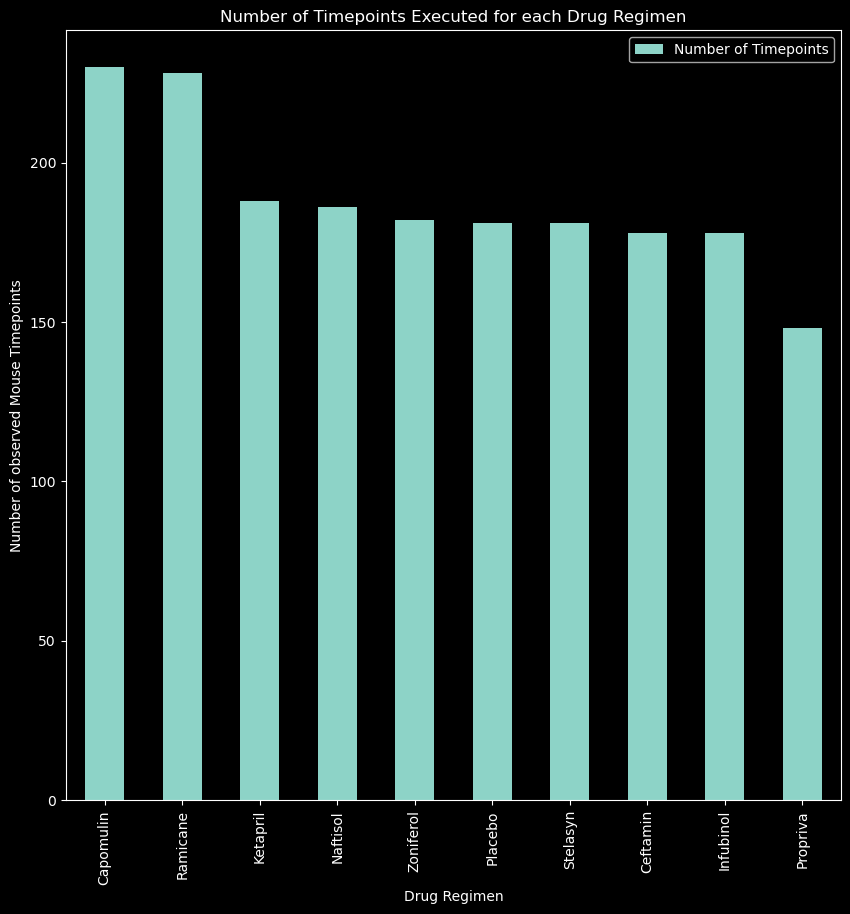

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Summary_Bar_count = DI_mergedmouse_study_clean_df.groupby(DI_mergedmouse_study_clean_df['Drug Regimen']).count()
Summary_Bar_count =pd.DataFrame(Summary_Bar_count)
Summary_Bar_count = Summary_Bar_count.sort_values(by=["Tumor Volume (mm3)"], ascending=False)
display(Summary_Bar_count)

Summary_Bar_Chart = Summary_Bar_count.plot(kind='bar', figsize=(10,10))
Summary_Bar_Chart.set_xlabel("Drug Regimen")
Summary_Bar_Chart.set_ylabel("Number of observed Mouse Timepoints")
Summary_Bar_Chart.set_title("Number of Timepoints Executed for each Drug Regimen")
Summary_Bar_Chart.legend(['Number of Timepoints'])



,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


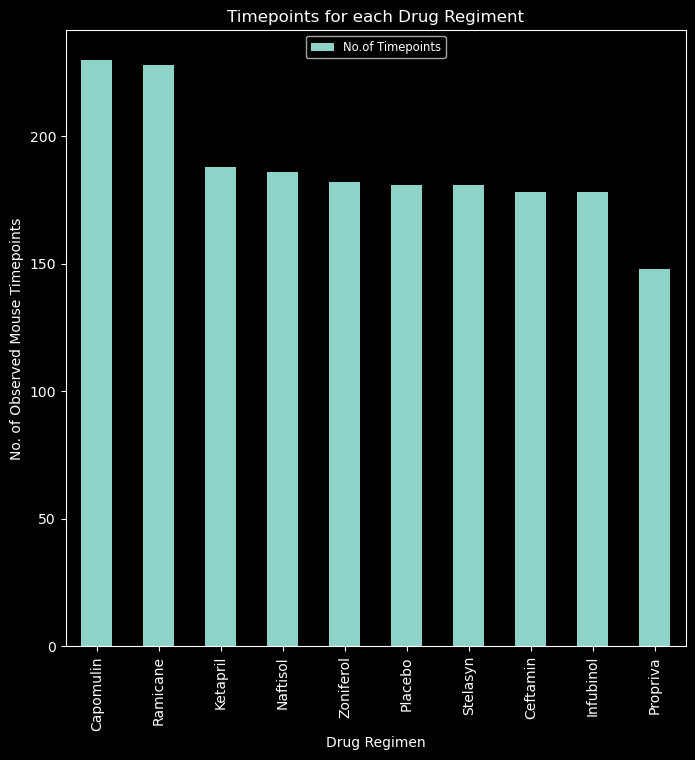

In [12]:

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
display(Summary_Bar_count)

Summary_Bar_count= pd. DataFrame(Summary_Bar_count)
Summary_Bar_count.plot(kind="bar",figsize=(8,8))
plt.ylabel('No. of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.title('Timepoints for each Drug Regiment')
plt.legend(['No.of Timepoints'], fontsize='small', loc=9)
plt.show()


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender_df = mergedmouse_study_clean_df[["Sex", "Mouse ID"]]
Gender_df
Gender_df= Gender_df["Sex"].value_counts()
sex_data_df = pd.DataFrame(Gender_df)


sex_data_df=Gender_df.groupby("Sex").sum().reset_index()
Total_Mouse_Count= sex_data_df['count'].sum()
sex_data_df["Percentage"] = (sex_data_df['count'] / Total_Mouse_Count * 100).round(1)
sex_data_df




,Sex,count,Percentage
0,Female,922,49.0
1,Male,958,51.0


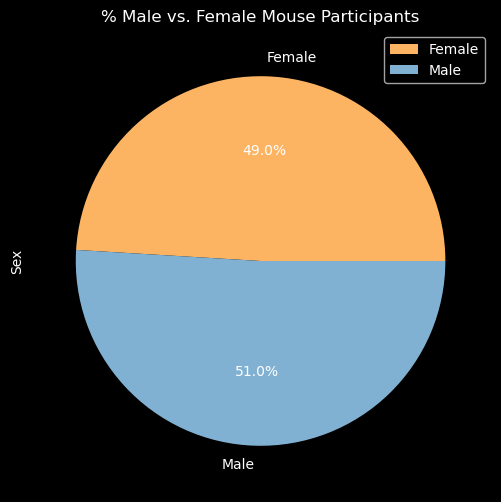

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data_Chart = sex_data_df.plot(kind='pie', y=("count"), figsize=(6,6), colors=["C5", "C4"], autopct="%1.1f%%", title="% Male vs. Female Mouse Participants",ylabel="Sex", labels=["Female", "Male"])



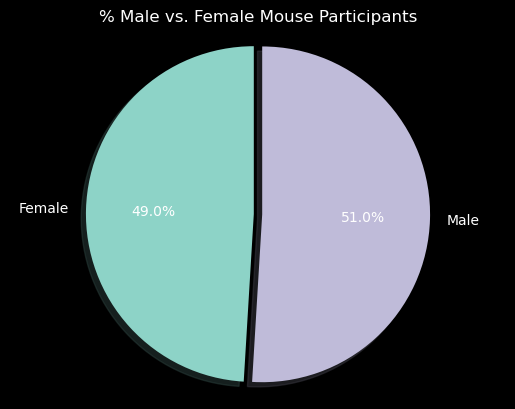

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_data_df["Sex"]
sizes = sex_data_df["count"]
colours = ["C0", "C2"]
explode = [0.05, 0]

plt.title("% Male vs. Female Mouse Participants")
plt.pie(sizes, explode=explode, labels=labels, colors=colours, autopct="%1.1f%%", shadow=True, startangle = 90)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [184]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Stats_df = mergedmouse_study_df.copy()
Stats_df.drop(['Sex', 'Weight (g)', 'Age_months', 'Tumor Volume (mm3)', 'Drug Regimen', 'Is Dup', 'Metastatic Sites'], axis=1, inplace=True)
Stats_clean_df = Stats_df.groupby(Stats_df['Mouse ID']).max().reset_index()
display(Stats_clean_df.head(16))
display(Stats_clean_df.info())

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
5,a401,45
6,a411,45
7,a444,45
8,a457,10
9,a492,45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mouse ID   249 non-null    object
 1   Timepoint  249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


None

In [185]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Stats_Merge_df = pd.merge(Stats_clean_df, mergedmouse_study_clean_df, how = "left", on=["Mouse ID", "Timepoint"])
Stats_Merge_df = pd.DataFrame(Stats_Merge_df).dropna().reset_index()
Stats_Merge_df = Stats_Merge_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
drug_subset = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Stats_Merge_df = Stats_Merge_df[Stats_Merge_df["Drug Regimen"].isin(drug_subset)]
display(Stats_Merge_df.head(15))
display(Stats_Merge_df.info())

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
3,a275,45,62.999356,Ceftamin
6,a411,45,38.407618,Ramicane
7,a444,45,43.047543,Ramicane
10,a520,45,38.810366,Ramicane
11,a577,30,57.031862,Infubinol
12,a644,45,32.978522,Ramicane
13,a685,45,66.083066,Infubinol
19,b128,45,38.982878,Capomulin


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 245
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
 3   Drug Regimen        100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


None

In [186]:
# Put treatments into a list for for loop (and later for plot labels)
drug_subset = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volumes_Capomulin = []
Tumor_Volumes_Ramicane = []
Tumor_Volumes_Infubinol = []
Tumor_Volumes_Ceftamin = []

for index, rows in Stats_Merge_df.iterrows():
    if rows['Drug Regimen']=='Capomulin': 
      Tumor_Volumes_Capomulin.append(rows['Tumor Volume (mm3)'])
    elif rows['Drug Regimen']=='Ramicane': 
      Tumor_Volumes_Ramicane.append(rows['Tumor Volume (mm3)'])
    elif rows['Drug Regimen']=='Infubinol': 
      Tumor_Volumes_Infubinol.append(rows['Tumor Volume (mm3)'])
    elif rows['Drug Regimen']=='Ceftamin':
      Tumor_Volumes_Ceftamin.append(rows['Tumor Volume (mm3)'])

print([Tumor_Volumes_Capomulin])
print([Tumor_Volumes_Ramicane])
print([Tumor_Volumes_Infubinol])
print([Tumor_Volumes_Ceftamin])


[[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]]
[[38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]]
[[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]]
[[62.99935619, 45.0, 56

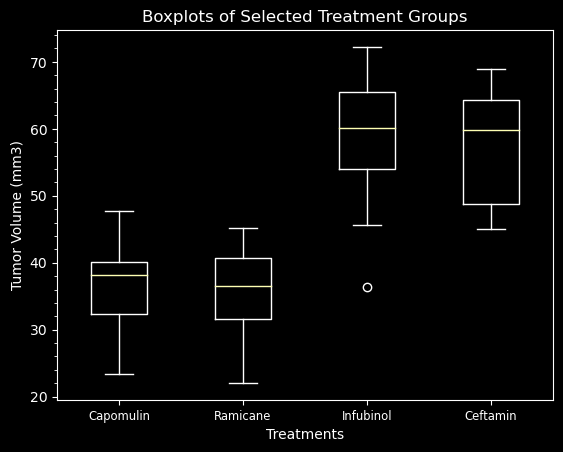

In [187]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_data = pd.DataFrame({
'Capomulin' : Tumor_Volumes_Capomulin,
'Ramicane' : Tumor_Volumes_Ramicane,
'Infubinol' : Tumor_Volumes_Infubinol,
'Ceftamin' : Tumor_Volumes_Ceftamin,
})
# x = (0, 100, 20)

bp = plt.boxplot (np.array(box_data), labels=list(box_data))
plt. title('Boxplots of Selected Treatment Groups')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatments')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom =False)
plt.tick_params(axis='x', which='major', labelsize='small')


plt.show()


In [188]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

print(f"------")
print(f"Capomulin")
Quartiles_Calculated_Cap = box_data['Capomulin'].quantile([.25,.5,.75])
Q1 = Quartiles_Calculated_Cap[0.25]
Q3 = Quartiles_Calculated_Cap[0.75]
IQR = Q3-Q1

print(f"The Q1 quartile of Capomulin is: {Q1}")
print(f"The Q3 quartile of Capomulin is: {Q3}")
print(f"The IQR of Capomulin is: {IQR}")
print(f"Capomulin median is: {Quartiles_Calculated_Cap[0.5]} ")

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(f"Values < {Q1} are potential outliers.")
print(f"Values > {Q3} are potential outliers.")
    
print(f"------")
print(f"Ramicane")
Quartiles_Calculated_Ram = box_data['Ramicane'].quantile([.25,.5,.75])
Q1 = Quartiles_Calculated_Ram[0.25]
Q3 = Quartiles_Calculated_Ram[0.75]
IQR = Q3-Q1

print(f"The Q1 quartile of Ramicane is: {Q1}")
print(f"The Q3 quartile of Ramicane is: {Q3}")
print(f"The IQR of Ramicane is: {IQR}")
print(f"Ramicane median is: {Quartiles_Calculated_Ram[0.5]} ")

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(f"Values < {Q1} are potential outliers.")
print(f"Values > {Q3} are potential outliers.")


print(f"------")
print(f"Infubinol")
Quartiles_Calculated_Inf = box_data['Infubinol'].quantile([.25,.5,.75])
Q1 = Quartiles_Calculated_Inf[0.25]
Q3 = Quartiles_Calculated_Inf[0.75]
IQR = Q3-Q1

print(f"The Q1 quartile of Infubinol is: {Q1}")
print(f"The Q3 quartile of Infubinol is: {Q3}")
print(f"The IQR of Infubinol is: {IQR}")
print(f"Infubinol median is: {Quartiles_Calculated_Inf[0.5]} ")

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(f"Values < {Q1} are potential outliers.")
print(f"Values > {Q3} are potential outliers.")

print(f"------")
print(f"Ceftamin")
Quartiles_Calculated_Cef = box_data['Ceftamin'].quantile([.25,.5,.75])
Q1 = Quartiles_Calculated_Cef[0.25]
Q3 = Quartiles_Calculated_Cef[0.75]
IQR = Q3-Q1

print(f"The Q1 quartile of Ceftamin is: {Q1}")
print(f"The Q3 quartile of Ceftamin is: {Q3}")
print(f"The IQR of Ceftamin is: {IQR}")
print(f"Ceftamin median is: {Quartiles_Calculated_Cef[0.5]} ")

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(f"Values < {Q1} are potential outliers.")
print(f"Values > {Q3} are potential outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

------
Capomulin
The Q1 quartile of Capomulin is: 32.37735684
The Q3 quartile of Capomulin is: 40.1592203
The IQR of Capomulin is: 7.781863460000004
Capomulin median is: 38.1251644 
Values < 32.37735684 are potential outliers.
Values > 40.1592203 are potential outliers.
------
Ramicane
The Q1 quartile of Ramicane is: 31.56046955
The Q3 quartile of Ramicane is: 40.65900627
The IQR of Ramicane is: 9.098536719999998
Ramicane median is: 36.56165229 
Values < 31.56046955 are potential outliers.
Values > 40.65900627 are potential outliers.
------
Infubinol
The Q1 quartile of Infubinol is: 54.04860769
The Q3 quartile of Infubinol is: 65.52574285
The IQR of Infubinol is: 11.477135160000003
Infubinol median is: 60.16518046 
Values < 54.04860769 are potential outliers.
Values > 65.52574285 are potential outliers.
------
Ceftamin
The Q1 quartile of Ceftamin is: 48.72207785
The Q3 quartile of Ceftamin is: 64.29983003
The IQR of Ceftamin is: 15.577752179999997
Ceftamin median is: 59.85195552 
Value

## Line and Scatter Plots

     Mouse ID  Timepoint  Tumor Volume (mm3)
0        b128          0           45.000000
468      b128          5           45.651331
674      b128         10           43.270852
713      b128         15           43.784893
925      b128         20           42.731552
1257     b128         25           43.262145
1388     b128         30           40.605335
1535     b128         35           37.967644
1616     b128         40           38.379726
1751     b128         45           38.982878


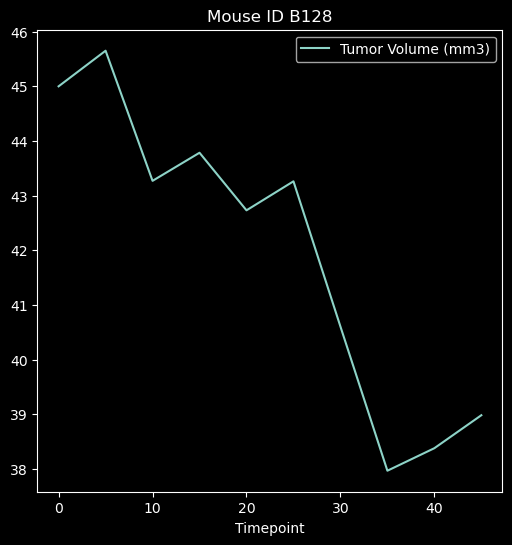

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Single_mouse_df = mergedmouse_study_clean_df.copy()
Single_mouse_df = pd.DataFrame(Single_mouse_df).reset_index()
Single_mouse_df = Single_mouse_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Single_mouse_df = pd.DataFrame(Single_mouse_df).dropna()
Single_mouse_df = Single_mouse_df.loc[Single_mouse_df['Mouse ID']=='b128']

print(Single_mouse_df)

B128_Chart = Single_mouse_df.plot(kind='line', x=("Timepoint"), figsize=(6,6), title="Mouse ID B128",xlabel="Timepoint")

In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mouse_df = mergedmouse_study_clean_df.copy()
Capomulin_mouse_df = pd.DataFrame(Capomulin_mouse_df).dropna()
Capomulin_mouse_df = Capomulin_mouse_df.loc[Capomulin_mouse_df["Drug Regimen"]=='Capomulin']
Capomulin_mouse_df = Capomulin_mouse_df[["Weight (g)","Drug Regimen", "Tumor Volume (mm3)"]]
Capomulin_mouse_df = Capomulin_mouse_df.rename(columns={'Weight (g)' : "Weight", 'Tumor Volume (mm3)' : 'Avg_Tumor_Volume(mm3)'})
Capomulin_mouse_df = pd.DataFrame(Capomulin_mouse_df.groupby(['Weight'])['Avg_Tumor_Volume(mm3)'].mean())
print(Capomulin_mouse_df)


        Avg_Tumor_Volume(mm3)
Weight                       
15                  36.182040
17                  37.214133
19                  41.182391
20                  39.141053
21                  42.088700
22                  43.288490
23                  43.341051
24                  44.805810
25                  44.062109


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

